# Data Cleaning and Feature Selection

## In this file, the json data from the accelerometer data will be preprocessed in the folloing ways:

1.

2.

3.

4.

First we import the packages we need for the project.

In [10]:
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 6)
import numpy as np
import matplotlib.pyplot as plt
import json
from types import SimpleNamespace as Namespace

Populating the interactive namespace from numpy and matplotlib


Read the json files and parse it.

In [2]:
file_directory = '../../data/Pin hole tip.json'

# Pin hole tip.json 
# Scallop tip.json


json_data=open(file_directory).read()

# print(json_data[:100])

x = json.loads(json_data, object_hook=lambda d: Namespace(**d))
print(len(x.data))
# print(x.data[100].event.content)

76360
[-0.9916220903396606, -0.031881995499134064, -0.01417229138314724, 1510840155321]


mean: -0.998357902405


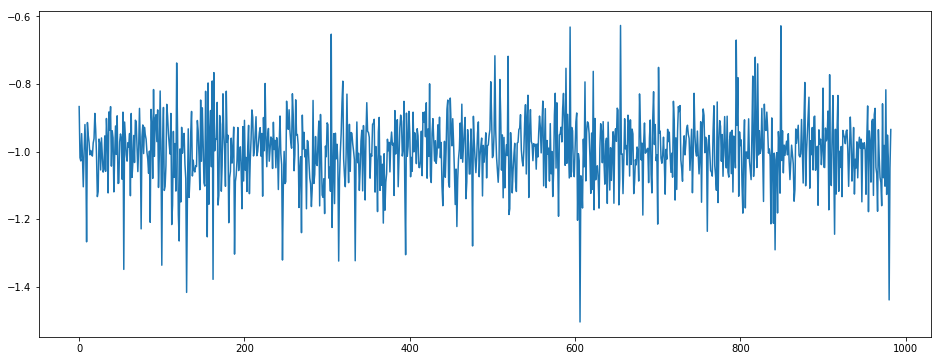

In [37]:
xRow = list()
start = 6000
limit = 8000 #len(x.data)
variable = 'quaternion' #quaternion acceleration
for index in range(start,limit):
#     print(x.data[index].event.variable == 'acceleration')
    if(x.data[index].event.variable == 'acceleration'):#quaternion
        xRow.append(x.data[index].event.content[0])
        
mean = sum(xRow)/len(xRow)
print('mean:', mean)
    
    
plt.plot(range(0,limit if len(xRow)>limit else len(xRow)), xRow[:limit], '-')

mean: -0.0288861356763


In the graph it can show some interesting patterns. Based on the waves there should be some interesting things coming out.


The easiest features we can extract is mean, variance

### From the papers and the question itself, Hidden Markov Model could be a good choice. It is widely used in time series voice data processing.